# Exploring customer reviews for British Airways

## The primary task for this project is to provide the BA team with a detailed report on the customer view about their services. 
### A secondary task would be testing model performance and reporting on the best performing one for this dataset. 

## Questions

1. Which sentiment analysis model should be used for this dataset?
2. How do the BA customers feel about this brand? 

## Method

1. Data cleaning and processing.
2. Data analysis.
3. Model testing.

###  Data cleaning and processing.

In [2]:
# load the data

import pandas as pd

df= pd.read_csv("C:\\Users\\002624\\Downloads\\British-Airways\BA_reviews.csv")

In [3]:
df.describe()

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Unnamed: 0    0
reviews       0
dtype: int64


#### NLTK (Natural Language Toolkit) 

For tokenization, i applied nltk. 

In [5]:
%pip install nltk



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\002624\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
%pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 657.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.8 MB 726.2 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/1.8 MB 756.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.8 MB 841.6 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 965.4 kB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.8 MB 1.3 MB/s eta 0:00:02
   ---------- ----------------------------- 0.5/1.8 MB 1.3 MB/s eta 0:00:02
   --------------- ------------------------ 0.7/1.8 MB 1.5 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.8 MB 2.1 MB/s eta 0:00:01
   ------------------------- -------------- 1.1/1.8 MB 2.1 MB/s eta 0:00:01
   --------------------

after installing nltk, i applied the tokenization process to a reviews column in my DataFrame. 

In [7]:
df

,Unnamed: 0,reviews
0,0,✅ Trip Verified | British Airways at its bes...
1,1,✅ Trip Verified | An excellent flight! Despite...
2,2,✅ Trip Verified | I recently traveled with Bri...
3,3,✅ Trip Verified | My family and I were booke...
4,4,Not Verified | We had to change from AA to BA...
...,...,...
995,995,Not Verified | London to Vancouver. Economy w...
996,996,❎ Not Verified | Newcastle to Delhi via London...
997,997,✅ Trip Verified | Miami to Delhi via London. ...
998,998,Not Verified | London to Sydney via Singapore...


In [8]:
import nltk
from nltk.tokenize import word_tokenize

# Download the NLTK data required for tokenization (only need to run once)
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\002624\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Apply tokenization to each review
df['tokenized_reviews'] = df['reviews'].apply(word_tokenize)

# Display the tokenized text
print(df[['reviews', 'tokenized_reviews']].head())

                                             reviews  \
0  ✅ Trip Verified |   British Airways at its bes...   
1  ✅ Trip Verified | An excellent flight! Despite...   
2  ✅ Trip Verified | I recently traveled with Bri...   
3  ✅ Trip Verified |   My family and I were booke...   
4  Not Verified |  We had to change from AA to BA...   

                                   tokenized_reviews  
0  [✅, Trip, Verified, |, British, Airways, at, i...  
1  [✅, Trip, Verified, |, An, excellent, flight, ...  
2  [✅, Trip, Verified, |, I, recently, traveled, ...  
3  [✅, Trip, Verified, |, My, family, and, I, wer...  
4  [Not, Verified, |, We, had, to, change, from, ...  


In [10]:
df

,Unnamed: 0,reviews,tokenized_reviews
0,0,✅ Trip Verified | British Airways at its bes...,"[✅, Trip, Verified, |, British, Airways, at, i..."
1,1,✅ Trip Verified | An excellent flight! Despite...,"[✅, Trip, Verified, |, An, excellent, flight, ..."
2,2,✅ Trip Verified | I recently traveled with Bri...,"[✅, Trip, Verified, |, I, recently, traveled, ..."
3,3,✅ Trip Verified | My family and I were booke...,"[✅, Trip, Verified, |, My, family, and, I, wer..."
4,4,Not Verified | We had to change from AA to BA...,"[Not, Verified, |, We, had, to, change, from, ..."
...,...,...,...
995,995,Not Verified | London to Vancouver. Economy w...,"[Not, Verified, |, London, to, Vancouver, ., E..."
996,996,❎ Not Verified | Newcastle to Delhi via London...,"[❎, Not, Verified, |, Newcastle, to, Delhi, vi..."
997,997,✅ Trip Verified | Miami to Delhi via London. ...,"[✅, Trip, Verified, |, Miami, to, Delhi, via, ..."
998,998,Not Verified | London to Sydney via Singapore...,"[Not, Verified, |, London, to, Sydney, via, Si..."


## Text based data analysis project timeline

1. Lowercasing: Convert all tokens to lowercase to ensure consistency, especially since text data can be case-sensitive.
2. Removing Stopwords: Stopwords are common words (like "and," "the," "is") that usually don't carry significant meaning. Removing them can help focus on more meaningful words.
3. Stemming or Lemmatization:Stemming: Reduces words to their root form, which may not always be a real word (e.g., "running" to "run"). Lemmatization: Similar to stemming but produces real words (e.g., "better" to "good").
4.  Feature Extraction: Convert the tokens into a format that a machine learning model can understand. Common methods include:
    * Bag of Words: Counts the frequency of each word in a document.
    * TF-IDF (Term Frequency-Inverse Document Frequency): Weighs words by how unique they are across documents.
    * Word Embeddings: Like Word2Vec, GloVe, or BERT, which capture semantic meaning.

5. Sentiment Analysis or Classification: Apply a machine learning model (like Naive Bayes, Logistic Regression, or a deep learning model) to classify the sentiment of the text or perform another type of analysis.
6. Model Evaluation: Evaluate the performance of your model using metrics such as accuracy, precision, recall, F1-score, or confusion matrix to determine how well your model is performing.
7. Interpretation and Insights: Based on the analysis, derive insights about customer sentiments, common themes, or any other patterns that emerge from the data.
8. Visualization: Visualize the results using tools like Matplotlib, Seaborn, or WordClouds to make your findings more accessible and understandable.

#### Text Processing

In [11]:
df['tokenized_reviews'] = df['tokenized_reviews'].apply(lambda x: [word.lower() for word in x])


In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['tokenized_reviews'] = df['tokenized_reviews'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\002624\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

df['stemmed_reviews'] = df['tokenized_reviews'].apply(lambda x: [stemmer.stem(word) for word in x])


In [14]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

df['lemmatized_reviews'] = df['tokenized_reviews'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\002624\AppData\Roaming\nltk_data...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['lemmatized_reviews'].apply(lambda x: ' '.join(x)))

# For TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_reviews'].apply(lambda x: ' '.join(x)))


In [18]:
df

,Unnamed: 0,reviews,tokenized_reviews,stemmed_reviews,lemmatized_reviews
0,0,✅ Trip Verified | British Airways at its bes...,"[✅, trip, verified, |, british, airways, best,...","[✅, trip, verifi, |, british, airway, best, .,...","[✅, trip, verified, |, british, airway, best, ..."
1,1,✅ Trip Verified | An excellent flight! Despite...,"[✅, trip, verified, |, excellent, flight, !, d...","[✅, trip, verifi, |, excel, flight, !, despit,...","[✅, trip, verified, |, excellent, flight, !, d..."
2,2,✅ Trip Verified | I recently traveled with Bri...,"[✅, trip, verified, |, recently, traveled, bri...","[✅, trip, verifi, |, recent, travel, british, ...","[✅, trip, verified, |, recently, traveled, bri..."
3,3,✅ Trip Verified | My family and I were booke...,"[✅, trip, verified, |, family, booked, leave, ...","[✅, trip, verifi, |, famili, book, leav, londo...","[✅, trip, verified, |, family, booked, leave, ..."
4,4,Not Verified | We had to change from AA to BA...,"[verified, |, change, aa, ba, flight, london, ...","[verifi, |, chang, aa, ba, flight, london, mis...","[verified, |, change, aa, ba, flight, london, ..."
...,...,...,...,...,...
995,995,Not Verified | London to Vancouver. Economy w...,"[verified, |, london, vancouver, ., economy, l...","[verifi, |, london, vancouv, ., economi, lot, ...","[verified, |, london, vancouver, ., economy, l..."
996,996,❎ Not Verified | Newcastle to Delhi via London...,"[❎, verified, |, newcastle, delhi, via, london...","[❎, verifi, |, newcastl, delhi, via, london, ....","[❎, verified, |, newcastle, delhi, via, london..."
997,997,✅ Trip Verified | Miami to Delhi via London. ...,"[✅, trip, verified, |, miami, delhi, via, lond...","[✅, trip, verifi, |, miami, delhi, via, london...","[✅, trip, verified, |, miami, delhi, via, lond..."
998,998,Not Verified | London to Sydney via Singapore...,"[verified, |, london, sydney, via, singapore, ...","[verifi, |, london, sydney, via, singapor, ., ...","[verified, |, london, sydney, via, singapore, ..."


#### Sentiment Analysis

splitting test and train data 

In [35]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
# X could be your vectorized text data, and y could be the sentiment labels

X = vectorizer.fit_transform(df['lemmatized_reviews'].apply(lambda x: ' '.join(x)))  # This should be your feature matrix
y = df['reviews']     # This should be your target variable (e.g., sentiment labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you can train your model using X_train and y_train, and test it using X_test and y_test


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Choose the column with the preprocessed text you want to use
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['lemmatized_reviews'].apply(lambda x: ' '.join(x)))

# Now X is your feature matrix, ready to be used for training a model


In [34]:
print(X.shape)  # Should output something like (number_of_samples, number_of_features)


(1000, 7004)


##### Naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume 'labels' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, df['reviews'], test_size=0.3, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.0


In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the reviews to create the feature matrix
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['lemmatized_reviews'].apply(lambda x: ' '.join(x)))

# Assume 'sentiment' or a similar column is your target variable
y = df['reviews']  # Replace 'sentiment' with the actual name of your target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate and print the accuracy
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.0


evaluating feature importance

In [39]:
import numpy as np

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the log-probabilities of each feature for each class
class_labels = model.classes_
log_probs = model.feature_log_prob_

for i, class_label in enumerate(class_labels):
    top_features = np.argsort(log_probs[i])[::-1][:10]  # Get top 10 features for this class
    print(f"\nTop features for class '{class_label}':")
    for feature_index in top_features:
        print(f"{feature_names[feature_index]}: {log_probs[i][feature_index]}")



Top features for class 'Not Verified |  
We traveled to Lisbon for our dream vacation, a cruise to Portugal and Spain. Our friends did not EVER get their luggage. It was a two week cruise. Two weeks without a change of clothes or her CPAP machine. Contacting customer service was a nightmare. We never talked to a real person. Very little effort was put into getting them their bags. In one port we were on the ship and the bags were at the airport. The airlines did not deliver the bags nor did they tell our friends that they needed to go get them. The airline couldn’t be bothered to take the bags from the airport to the ship. BA says it is their policy to get you your bags within 72 hours. That is a joke! It’s been over two weeks and they still don’t have them. They are back home in the US and last they heard the bags were in Lisbon! If your have a choice, do not fly British Airways. Customer Service is non existent!':
bag: -8.535322615411818
ship: -8.598593022099282
cruise: -8.615715564

visualization

) missing from font(s) DejaVu Sans.ges\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
C:\Users\002624\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
) missing from font(s) DejaVu Sans.ges\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\002624\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

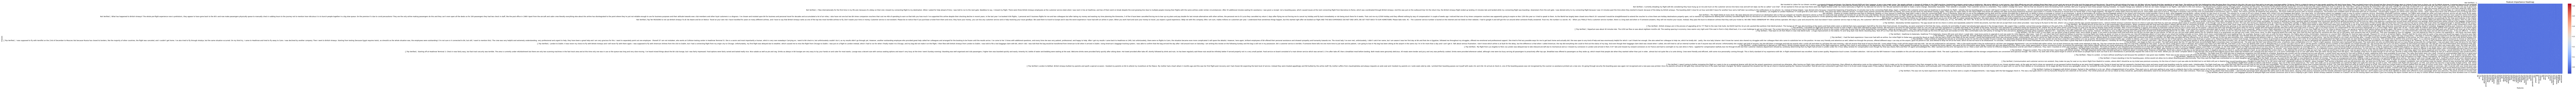

In [54]:
import seaborn as sns
import matplotlib as plt

# Get the coefficients for all classes
coefficients = model.coef_

# Create a DataFrame for easier visualization
coef_df = pd.DataFrame(coefficients, columns=feature_names, index=model.classes_)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(coef_df, cmap='coolwarm', annot=False)
plt.title('Feature Importance Heatmap')
plt.xlabel('Features')
plt.ylabel('Classes')
plt.show()


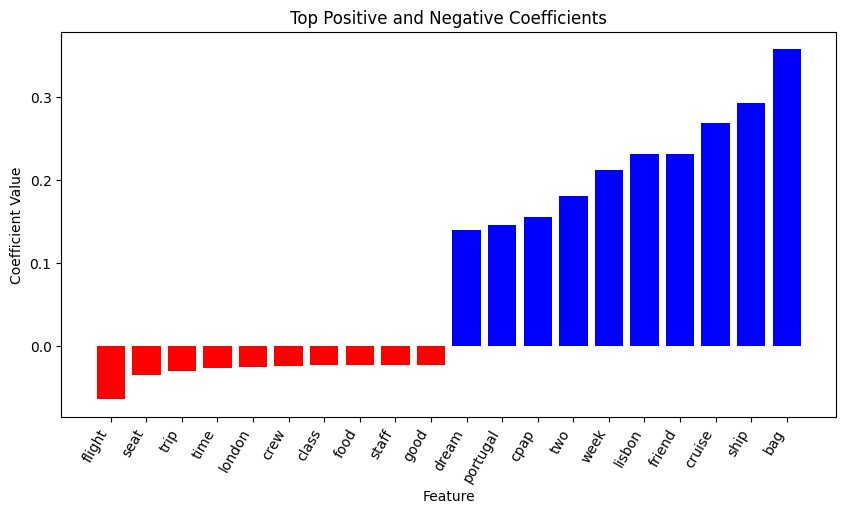

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming model is already trained
feature_names = vectorizer.get_feature_names_out()  # Assuming you used TF-IDF or similar
coefficients = model.coef_[0]  # Coefficients for the first class (in binary classification)

# Sort the features by their importance
top_positive_coefficients = np.argsort(coefficients)[-10:]
top_negative_coefficients = np.argsort(coefficients)[:10]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

# Create the plot
plt.figure(figsize=(10, 5))
colors = ['red' if c < 0 else 'blue' for c in coefficients[top_coefficients]]
plt.bar(np.array(feature_names)[top_coefficients], coefficients[top_coefficients], color=colors)
plt.xticks(rotation=60, ha='right')
plt.title('Top Positive and Negative Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.show()


##### Logistic Regression

##### Neural Networks

##### Random Forest

##### Support Vector Machine (SVM)

#### visualization

In [21]:
%pip install wordcloud

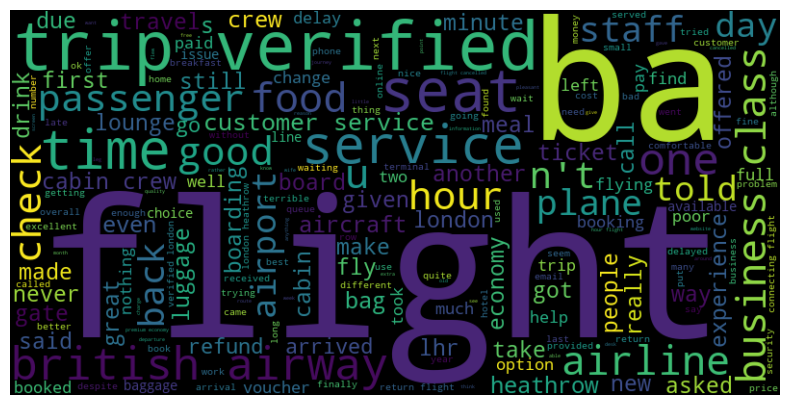

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['lemmatized_reviews'].apply(lambda x: ' '.join(x))))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Results.